<a href="https://colab.research.google.com/github/gaurikapoplai21/CCBD-Project/blob/master/25-JUNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EN. 601.467/667 Introduction to Human Language Technology
# End-to-End Speech Recognition Toolkit
**Deadline 16, October, 2019**

- We use [ESPnet](https://github.com/espnet/espnet)
- This homework is designed to have an overview experience of end-to-end speech recognition. Various contents are not covered in the lecture due to the limitation of time.
- Adapted from the [Interspeech 2019 tutorial materials](https://github.com/espnet/interspeech2019-tutorial).
  - Special thanks to Shigeki Karita and Tomoki Hayashi.


## Google colaboratory

Before getting started, get familiar with google colaboratory:
https://colab.research.google.com/notebooks/welcome.ipynb

- Online Jupyter notebook environment
    - Can run python codes
    - Can also run linux command with ! mark
    - Can use a signal GPU (K80)
- What you need to use
    - Internet connection
    - Google account
    - Chrome browser (recommended)

This is a neat python environment that works in the cloud and does not require you to
set up anything on your personal machine
(it also has some built-in IDE features that make writing code easier).
Moreover, it allows you to copy any existing colaboratory file, alter it and share
with other people. In this homework, we will ask you to copy current colaboraty,
complete all the tasks and share your colaboratory notebook with us so
that we can grade it.

## Submission

Before you start working on this homework do the following steps:

1. Press __File > Save a copy in Drive...__ tab. This will allow you to have your own copy and change it.
2. Follow all the steps in this colaboratory file and write/change/uncomment code as necessary.
3. Do not forget to occasionally press __File > Save__ tab to save your progress.
4. After all the changes are done and progress is saved press __Share__ button (top right corner of the page), press __get shareable link__ and make sure you have the option __Anyone with the link can view__ selected.
5. Paste the link into your submission pdf file so that we can view it and grade.






# 1. Overview

ESPnet provides **bash recipes and python library** for speech processing.


## 1.1 Python library overview

- Python 3.6+
- Uses the following neural network libraries
  - PyTorch
  - Chainer


## 1.2 Bash recipe overview

ESPnet supports total 34+ ASR and other speech processing tasks including

- Multilingual ASR: en, zh, ja, etc
- Noise robust and far-field ASR
- Multichannel ASR: joint training with speech enhancement
- Speech Translation: transfer learning from ASR and MT

For more detail:
https://github.com/espnet/espnet/tree/master/egs


## 1.3 ASR Performance

On free corpora, ESPnet achieved:

- Aishell (zh): CER test: 6.7%
- Common Voice (en): WER test: 2.3%
- LibriSpeech (en): WER test-clean: 2.6%, test-other 5.7%
- TED-LIUM2 (en): WER test: 8.1%

**Pretrained models are available**

https://github.com/espnet/espnet#asr-results


# 2. Installation

ESPnet depends on Kaldi ASR toolkit and Warp-CTC.


## 2.1 Installation (on Google colab)

In Google colab, we can use pre-compiled binaries for faster startup (3 min):

In [ ]:
# OS setup
!cat /etc/os-release
!apt-get install -qq bc tree sox

# espnet setup
!git clone --depth 5 https://github.com/espnet/espnet
!pip install -q torch==1.5.1
!cd espnet; pip install -q -e .

# download pre-compiled warp-ctc and kaldi tools
!espnet/utils/download_from_google_drive.sh \
    "https://drive.google.com/open?id=13Y4tSygc8WtqzvAVGK_vRV9GlV7TRC0w" espnet/tools tar.gz > /dev/null
!cd espnet/tools/warp-ctc/pytorch_binding && \
    pip install -U dist/warpctc_pytorch-0.1.1-cp36-cp36m-linux_x86_64.whl

# make dummy activate
!mkdir -p espnet/tools/venv/bin && touch espnet/tools/venv/bin/activate
!echo "setup done."

# 3. AN4 ASR experiments based on ESPnet

- `espnet/egs/*/asr1/run.sh` is an out-of-the-box recipe
- It reproduces our reported results

![image.png](https://github.com/espnet/interspeech2019-tutorial/blob/master/notebooks/interspeech2019_asr/figs/stages.png?raw=1)

- **stage -1**: Download data if the data is available online.
- **stage 0**: Prepare data to make kaldi-style data directory.
- **stage 1**: Extract feature vector, calculate statistics, and normalize.
- **stage 2**: Prepare a dictionary and make json files for training.
- **stage 3**: Train the language model network.
- **stage 4**: Train the E2E-ASR network.
- **stage 5**: Decode speech data using the trained networks and perform scoring (provide the character error rate (CER), word error rate (WER), etc.).


<h1>Creating the required file structure</h1>

In [2]:
# Importing data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
dir_path = "/content/espnet/egs/telugu/asr1"

#Based on directory structure you may need to change espnet_zip_path, telugu_test_zip, telegu_train_zip
espnet_zip_path = "/content/drive/My Drive/telugu/telugu_espnet_data.zip"
telugu_test_zip = "/content/drive/My Drive/telugu/te-in-Test.zip"
telugu_train_zip = "/content/drive/My Drive/telugu/te-in-Train.zip"

# Making the required folders
!mkdir "/content/espnet/egs/telugu"
!mkdir "/content/espnet/egs/telugu/asr1"
!mkdir "/content/espnet/egs/telugu/asr1/wavdata"
!mkdir "/content/espnet/egs/telugu/asr1/wavdata/an4"
# !mkdir "/content/espnet/egs/telugu/asr1/filterbank"

# Unzip all the files provided by maam
!unzip "$espnet_zip_path" -d "$dir_path"
# Unzip the audio(wav) dataset
!unzip "$telugu_test_zip" -d "$dir_path/wavdata/an4"
!unzip "$telugu_train_zip" -d "$dir_path/wavdata/an4"

In [4]:
!mkdir "/content/espnet/egs/telugu/asr1/dump"

In [ ]:
#Delete this afterwards

# import os
# os.chdir("/content/espnet/egs/telegu/asr1/wavdata/an4/")

# !pwd

# !apt-get install p7zip-full

#  !7z e "$azuredataset_zip_path" -o"$dir_path/wavdata"

# !echo "$azuredataset_zip_path"

# !unzip "$azuredataset_zip_path" -d "$dir_path/wavdata"

# dir_path = "/content/espnet/egs/telegu/as1/temp"
# espnet_zip_path = "/content/drive/My Drive/telugu/telugu_espnet_data.zip"
# azuredataset_zip_path = "/content/drive/My Drive/telugu/azuredataset.zip"
# # Unzip all the files provided by maam
# !unzip "$espnet_zip_path" -d "$dir_path"

# # Unzip the dataset
# !unzip "/content/drive/My Drive/telugu/azuredataset.zip" -d "/content/espnet/egs/telegu/as1/wavdata"

# !mkdir "/content/espnet/egs/telegu/as1/wavdata"

In [ ]:
# def str_replace(str_1,str_2,filepath):
# 	fp = open(filepath,'r')
# 	fp_changed = open("wav1.scp",'w')
# 	for i in fp:
# 		x = i.split(str_1)
# 		y = x[0] + str_2 + x[1]
# 		fp_changed.write(y)

# 	fp.close()
# 	fp_changed.close()

# dir_path = "/content/espnet/egs/telegu/as1"
		
# str_replace("media/user/ProfSavitha",dir_path+"/wavdata/te-in-Train/Audios",dir_path+"/data/train/wav.scp")

## 3.1 Kaldi-style directory structure

Always we organize each recipe as `egs/xxx/asr1/run.sh`

The most important directories:
- `run.sh`: Main script of the recipe.
- `cmd.sh`: Command configuration script to control how-to-run each job.
- `path.sh`: Path configuration script. Basically, we do not need to touch.
- `conf/`: Directory containing configuration files e.g.g.
- `local/`: Directory containing the recipe-specific scripts e.g. data preparation.
- `steps/` and `utils/`: Directory containing kaldi tools.


In [5]:
# move on the recipe directory
import os
os.chdir("/content/espnet/egs/telugu/asr1")


# check files
!tree -L 1

.
├── dump
├── __MACOSX
├── telugu_espnet_data
└── wavdata

4 directories, 0 files


In [6]:
!mv telugu_espnet_data/* "./"


## 3.2 Data preparation (Stage 0 - 2)

For example, if you add `--stop-stage 2`, you can stop the script before neural network training.

These stages perform FBANK speech feature extraction, normalization, and text formatting.

![image.png](https://github.com/espnet/interspeech2019-tutorial/blob/master/notebooks/interspeech2019_asr/figs/stages_prep.png?raw=1)

In [7]:
!chmod 755 run.sh

In [8]:
!ls

cmd.sh	data  local	path.sh  telugu_espnet_data
conf	dump  __MACOSX	run.sh	 wavdata


In [9]:
!sed -i -e 's/\r$//' run.sh

In [10]:
!ln -s ../../../tools/kaldi/egs/wsj/s5/steps steps
!ln -s ../../../tools/kaldi/egs/wsj/s5/utils utils

In [11]:
# run stage -1 and then stop
# !./run.sh --stop_stage 2
# !cp "/content/espnet/tools/kaldi/egs/wsj/s5/utils/parse_options.sh" "/content/espnet/tools/kaldi/egs/wsj/s5/steps/"

!./run.sh --stage 1 --stop-stage 1

stage 1: Feature Generation
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh --cmd run.pl --nj 8 --write_utt2num_frames true data/test exp/make_fbank/test fbank
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh: moving data/test/feats.scp to data/test/.backup
utils/validate_data_dir.sh: Successfully validated data-directory data/test
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh: [info]: no segments file exists: assuming wav.scp indexed by utterance.
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh: Succeeded creating filterbank and pitch features for test
fix_data_dir.sh: kept all 3040 utterances.
fix_data_dir.sh: old files are kept in data/test/.backup
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh --cmd run.pl --nj 8 --write_utt2num_frames true data/train exp/make_fbank/train fbank
../../../tools/kaldi/egs/wsj/s5/steps/make_fbank_pitch.sh: moving data/train/feats.scp to data/train/.backup
utils/validate_data_dir.sh: Successfully valid

In [12]:
# !ls utils

In [13]:
!./run.sh --stage 2 --stop-stage 2

dictionary: data/lang_1char/train_nodev_units.txt
stage 2: Dictionary and Json Data Preparation
26 data/lang_1char/train_nodev_units.txt
/content/espnet/egs/telugu/asr1/../../../utils/data2json.sh --feat /content/espnet/egs/telegu/filterbank/train_nodev/deltafalse/feats.scp data/train_nodev data/lang_1char/train_nodev_units.txt
/content/espnet/egs/telugu/asr1/../../../utils/feat_to_shape.sh --cmd run.pl --nj 1 --filetype  --preprocess-conf  --verbose 0 /content/espnet/egs/telegu/filterbank/train_nodev/deltafalse/feats.scp data/train_nodev/tmp-9wJiq/input_1/shape.scp
/content/espnet/egs/telugu/asr1/../../../utils/data2json.sh --feat /content/espnet/egs/telegu/filterbank/train_dev/deltafalse/feats.scp data/train_dev data/lang_1char/train_nodev_units.txt
/content/espnet/egs/telugu/asr1/../../../utils/feat_to_shape.sh --cmd run.pl --nj 1 --filetype  --preprocess-conf  --verbose 0 /content/espnet/egs/telegu/filterbank/train_dev/deltafalse/feats.scp data/train_dev/tmp-jZZmz/input_1/shape.scp

Now ready to start training!

## 3.3 NN Training (Stage 3 - 4)

You can configure NN training with `conf/train_xxx.yaml`

![image.png](https://github.com/espnet/interspeech2019-tutorial/blob/master/notebooks/interspeech2019_asr/figs/stages_nn.png?raw=1)

## 3.3.1 Run LM

First, we train RNNLM for the AN4 data

In [14]:
# it takes 2 minutes
!./run.sh  --ngpu 1 --stage 3 --stop-stage 3

dictionary: data/lang_1char/train_nodev_units.txt
stage 3: LM Preparation
stage 4 completed


After we finish the LM training, we can check the perplexity from the log file (`train.log`)

In [15]:
# check the LM perplexity
!cat exp/train_rnnlm_chainer_false/train.log | grep perplexity

epoch       iteration   perplexity  val_perplexity  elapsed_time
2020-06-25 12:39:57,293 (lm:486) INFO: test perplexity: 3.720916339950318


Please check the `test perplexity` with the above command. The perplexity value should be around 14.

## 3.3.2 ASR NN training

We train ASR NN for the AN4 data

## ASR training config: RNN with Attention

- you can check the default config in the following command
- (optional) complete list of common options https://espnet.github.io/espnet/apis/espnet_bin.html#asr-train-py
- (optional) complete list of model-specific options https://espnet.github.io/espnet/_modules/espnet/nets/pytorch_backend/e2e_asr.html#E2E.add_arguments



In [16]:
!cat /content/espnet/egs/telugu/asr1/conf/train_mtlalpha0.5.yaml

# minibatch related
batch-size: 30
maxlen-in: 800  # if input length  > maxlen_in, batchsize is automatically reduced
maxlen-out: 150 # if output length > maxlen_out, batchsize is automatically reduced
# optimization related
sortagrad: 0 # Feed samples from shortest to longest ; -1: enabled for all epochs, 0: disabled, other: enabled for 'other' epochs
opt: adadelta
epochs: 100
patience: 3

# scheduled sampling option
sampling-probability: 0.0

# encoder related
etype: blstmp     # encoder architecture type
elayers: 4
eunits: 320
eprojs: 320
subsample: "1_2_2_1_1" # skip every n frame from input to nth layers
# decoder related
dlayers: 1
dunits: 300
# attention related
atype: location
adim: 320
aconv-chans: 10
aconv-filts: 100

# hybrid CTC/attention
mtlalpha: 0.5


# Report CER & WER
report-cer: true
report-wer: true


## Perform ASR NN training


In [17]:
pip install numba==0.48.0

     |████████████████████████████████| 2.5MB 2.7MB/s 
ERROR: espnet 0.8.0 has requirement numba==0.49, but you'll have numba 0.48.0 which is incompatible.
  Found existing installation: numba 0.49.0
    Uninstalling numba-0.49.0:
      Successfully uninstalled numba-0.49.0


In [18]:
!/content/espnet/tools/install_chainer_ctc.sh

Cloning into 'chainer_ctc'...
remote: Enumerating objects: 56, done.
remote: Total 56 (delta 0), reused 0 (delta 0), pack-reused 56
Unpacking objects: 100% (56/56), done.
Cloning into '.'...
remote: Enumerating objects: 827, done.
remote: Total 827 (delta 0), reused 0 (delta 0), pack-reused 827
Receiving objects: 100% (827/827), 386.00 KiB | 541.00 KiB/s, done.
Resolving deltas: 100% (424/424), done.
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
--

In [19]:
!env | grep LD_LIBRARY_PATH

LD_LIBRARY_PATH=/usr/lib64-nvidia


In [20]:
!$LD_LIBRARY_PATH

/bin/bash: /usr/lib64-nvidia: Is a directory


In [ ]:
!git clone https://github.com/SeanNaren/warp-ctc.git

Cloning into 'warp-ctc'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 797 (delta 0), reused 1 (delta 0), pack-reused 791
Receiving objects: 100% (797/797), 385.46 KiB | 534.00 KiB/s, done.
Resolving deltas: 100% (401/401), done.


In [ ]:
!cd warp-ctc
!mkdir build; cd build
!cmake ..
!make

CMake Error: The source directory "/content/espnet/egs/telugu" does not appear to contain CMakeLists.txt.
Specify --help for usage, or press the help button on the CMake GUI.
make: *** No targets specified and no makefile found.  Stop.


In [ ]:
!export LD_LIBRARY_PATH=/usr/local/lib:$LD_LIBRARY_PATH

In [ ]:
!$LD_LIBRARY_PATH

/bin/bash: /usr/lib64-nvidia: Is a directory


In [ ]:
import torch
from warpctc_pytorch import CTCLoss
ctc_loss = CTCLoss()
# expected shape of seqLength x batchSize x alphabet_size
probs = torch.FloatTensor([[[0.1, 0.6, 0.1, 0.1, 0.1], [0.1, 0.1, 0.6, 0.1, 0.1]]]).transpose(0, 1).contiguous()
labels = torch.IntTensor([1, 2])
label_sizes = torch.IntTensor([2])
probs_sizes = torch.IntTensor([2])
probs.requires_grad_(True)  # tells autograd to compute gradients for probs
cost = ctc_loss(probs, labels, probs_sizes, label_sizes)
cost.backward()

ImportError: ignored

In [21]:
# WARNING: This code takes 5-6 minutes!
!./run.sh  --ngpu 1 --stage 4 --stop-stage 4 --train-config conf/train_mtlalpha0.5.yaml

dictionary: data/lang_1char/train_nodev_units.txt
stage 4: Network Training
run.pl: job failed, log is in exp/train_nodev_chainer_train_mtlalpha0.5/train.log


The training log file is stored in `exp/train_nodev_pytorch_train_mtlalpha0.5/train.log`.

Let's first look at the validation result of the initial training with the following command:

In [ ]:
!grep -e groundtruth -e prediction exp/train_nodev_pytorch_train_mtlalpha0.5/train.log \
  | sed -e 's/<eos>//g' -e 's/<space>/ /g' | head -n 20

2020-06-22 18:35:37,405 (decoders:300) INFO: groundtruth[0]: FOUR TWO TWO TWO OH EIGHT NINE
2020-06-22 18:35:37,405 (decoders:301) INFO: prediction [0]: KKAAAHHDFWQDFWDDDDQOKKAOCCCCALL
2020-06-22 18:35:37,405 (decoders:300) INFO: groundtruth[1]: JUNE TWENTY THIRD NINETEEN SIXTY NINE
2020-06-22 18:35:37,405 (decoders:301) INFO: prediction [1]: KNNLLLJDMLLDDDDACHHDLLLLLLLLLLLXXRLLL
2020-06-22 18:35:37,405 (decoders:300) INFO: groundtruth[2]: J O S E P H
2020-06-22 18:35:37,405 (decoders:301) INFO: prediction [2]: KNHHWWWWWWWR
2020-06-22 18:35:37,405 (decoders:300) INFO: groundtruth[3]: ONE FIVE TWO ONE THREE
2020-06-22 18:35:37,405 (decoders:301) INFO: prediction [3]: KKPLWKAKVHLDFHQQLWLAKKK
2020-06-22 18:35:37,405 (decoders:300) INFO: groundtruth[4]: ONE FIVE TWO THREE TWO
2020-06-22 18:35:37,405 (decoders:301) INFO: prediction [4]: KKPLWKAKVHLDFHDAKKKKLDK
2020-06-22 18:35:38,237 (decoders:300) INFO: groundtruth[0]: S T O D O L S K Y
2020-06-22 18:35:38,238 (decoders:301) INFO: predicti

By comparing the groundtruth and prediction results, you could see that it did not produce meaningful results.

Then, let's check the validation result of the final training with the following command:

In [ ]:
!grep -e groundtruth -e prediction exp/train_nodev_pytorch_train_mtlalpha0.5/train.log \
  | sed -e 's/<eos>//g' -e 's/<space>/ /g' | tail -n 20

2020-06-22 18:42:20,496 (decoders:300) INFO: groundtruth[0]: TWO FIFTEEN SIXTY TWO
2020-06-22 18:42:20,496 (decoders:301) INFO: prediction [0]: TWO SIVTYE  SIXTY SWO 
2020-06-22 18:42:20,497 (decoders:300) INFO: groundtruth[1]: O U FOUR SEVEN TWENTY NINE
2020-06-22 18:42:20,497 (decoders:301) INFO: prediction [1]: M N R UR NEVEN NWENTY NINE
2020-06-22 18:42:20,497 (decoders:300) INFO: groundtruth[2]: TWO FIVE TWO TWO OH TWO NINE
2020-06-22 18:42:20,497 (decoders:301) INFO: prediction [2]: TWO FIVE TWO TWO TN TWO TINE 
2020-06-22 18:42:20,497 (decoders:300) INFO: groundtruth[3]: ELEVEN NINE SIXTY EIGHT
2020-06-22 18:42:20,497 (decoders:301) INFO: prediction [3]: NNVNEN NINE NIX Y NIGHT 
2020-06-22 18:42:20,497 (decoders:300) INFO: groundtruth[4]: ONE FIVE TWO ONE SEVEN
2020-06-22 18:42:20,497 (decoders:301) INFO: prediction [4]: ONE FIVE TWO ONE SEVEN
2020-06-22 18:42:20,700 (decoders:300) INFO: groundtruth[0]: NO
2020-06-22 18:42:20,700 (decoders:301) INFO: prediction [0]: NO
2020-06-2

Compared with the initial result, the prediction is close to the groundtruth. Training seems to be going well.

You can also check the training and validation accuracies from `exp/train_nodev_pytorch_train_mtlalpha0.5/results/acc.png`


acc.png


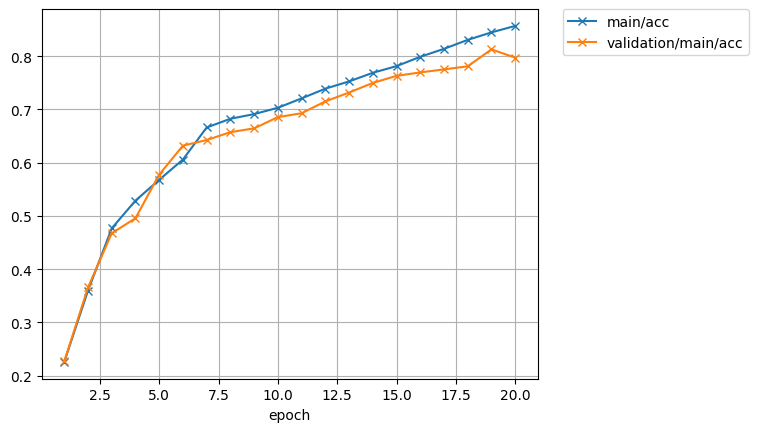

In [ ]:
import glob
from IPython.display import Image, display_png
expdir = "exp/train_nodev_pytorch_train_mtlalpha0.5/results/"
for name in ["acc.png"]:
    print(name)
    display_png(Image(expdir + name, width=500))

Please confirm that both training and validation accuracies are improved with more epochs, but finally converged.

## 3.4 Decoding and evaluation (Stage 5)

The last stage of ASR recipe

![image.png](https://github.com/espnet/interspeech2019-tutorial/blob/master/notebooks/interspeech2019_asr/figs/stages_eval.png?raw=1)

### decoding config
- you can check the default config in the following command
- (option) complete list of common options https://espnet.github.io/espnet/apis/espnet_bin.html#asr-recog-py

In [ ]:
!cat conf/decode_ctcweight0.5.yaml

# decoding parameter
beam-size: 20
penalty: 0.0
maxlenratio: 0.0
minlenratio: 0.0
ctc-weight: 0.5
lm-weight: 1.0


### Language model weight
- `lm-weight:` language model (LM) weight $\lambda$

- without LM

  $\hat{W} = \arg \max _{W} \log p(W|O) = \arg \max _{W}  \log p_{\text{e2e}}(W|O)$


- with LM

  $\hat{W} = \arg \max _{W} \log p(W|O) = \arg \max _{W}  (\log p_{\text{e2e}}(W|O) + \lambda \log p_{\text{lm}}(W))$



### Run ASR decoding

In [ ]:
# WARNING: This code takes 6 minutes!
# Only recognize the test set
!sed -i.bak -e's/recog_set="train_dev test"/recog_set="test"/' run.sh
# run the actual recognition script
!./run.sh --stage 5 --decode-config conf/decode_ctcweight0.5.yaml --train-config conf/train_mtlalpha0.5.yaml

dictionary: data/lang_1char/train_nodev_units.txt
stage 5: Decoding
2020-06-22 18:42:36,388 (splitjson:43) INFO: /usr/bin/python3 /content/espnet/egs/an4/asr1/../../../utils/splitjson.py --parts 8 dump/test/deltafalse/data.json
2020-06-22 18:42:36,389 (splitjson:55) INFO: number of utterances = 130
2020-06-22 18:46:39,316 (concatjson:36) INFO: /usr/bin/python3 /content/espnet/egs/an4/asr1/../../../utils/concatjson.py exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_lm_word100/data.1.json exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_lm_word100/data.2.json exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_lm_word100/data.3.json exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_lm_word100/data.4.json exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_lm_word100/data.5.json exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_lm_word100/data.6.js

You can get the Character Error Rate (CER) by checking the `Err` column in the last line

## 4. Compare the result w/ and w/o language model (main homework)

1. modify the decoding config file by the `sed` command and set `lm-weight` to `{0.0, 0.1, 0.2, 0.3}` and rename the config appropriately
2. perform recognition

The following is an example of how to change the language model weight



In [ ]:
!sed -e 's/lm-weight: 1.0/lm-weight: 0.1/' conf/decode_ctcweight0.5.yaml | tee conf/decode_ctcweight0.5_lmweight0.1.yaml

# decoding parameter
beam-size: 20
penalty: 0.0
maxlenratio: 0.0
minlenratio: 0.0
ctc-weight: 0.5
lm-weight: 0.1


In [ ]:
!./run.sh --stage 5 --decode-config conf/decode_ctcweight0.5_lmweight0.1.yaml --train-config conf/train_mtlalpha0.5.yaml

dictionary: data/lang_1char/train_nodev_units.txt
stage 5: Decoding
2020-06-22 18:46:45,870 (splitjson:43) INFO: /usr/bin/python3 /content/espnet/egs/an4/asr1/../../../utils/splitjson.py --parts 8 dump/test/deltafalse/data.json
2020-06-22 18:46:45,871 (splitjson:55) INFO: number of utterances = 130
2020-06-22 18:50:16,825 (concatjson:36) INFO: /usr/bin/python3 /content/espnet/egs/an4/asr1/../../../utils/concatjson.py exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_lmweight0.1_lm_word100/data.1.json exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_lmweight0.1_lm_word100/data.2.json exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_lmweight0.1_lm_word100/data.3.json exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_lmweight0.1_lm_word100/data.4.json exp/train_nodev_pytorch_train_mtlalpha0.5/decode_test_decode_ctcweight0.5_lmweight0.1_lm_word100/data.5.json exp/train_nodev_pytorch_train_mtla

**Important Note**: 
- Unfortunately, the result would be changing with different Google colab images. Please finish the above experiments in a half day (otherwise it may use a different image and results would not be consistent)